In [1]:
import csv
import os
import numpy as np
from envs.utils import printoptions

%pylab inline
import matplotlib.pyplot as plt


def get_stats(algorithm="mceirl", env="room", spec="default", comb="use_prior", param_tuned='k', path="./results/tuning"):
    results_list=[]
    for file in os.listdir(path):
        if algorithm in file and env in file and spec in file and comb in file and "-"+param_tuned in file:
            #print(os.path.join("./results", file))

            with open(os.path.join(path, file), 'rt') as f:
                reader = csv.reader(f)
                # the first line is names of returned items, e g [seed, true_r, final_r]
                list_results = list(reader)[1::]
                list_rewards = []
                for res in list_results:
                    list_rewards.append(float(res[1]))
                list_rewards = np.asarray(list_rewards)

                param_val = file.split('-'+param_tuned+'=', 1)[-1]
                param_val = param_val.split('-')[0]

                results_list.append([float(param_val), np.mean(list_rewards), np.std(list_rewards)])
    results_list = np.asarray(results_list)
    # return a list sorted by the value of k
    return results_list[results_list[:,0].argsort()]
    
    
def plot_params_multiple(stats_list, c='b'):
    stats_stack = np.vstack(stats_list)
    y_min = np.amin(stats_stack[:,1] - stats_stack[:,2]) - .1
    y_max = np.amax(stats_stack[:,1] + stats_stack[:,2]) + .1
    
    plt.figure(figsize=(4*len(stats_list), 2))
    for i in range(len(stats_list)):
        stats = stats_list[i]
        ax = plt.subplot(1, len(stats_list), i+1)
        ax.set_ylim(y_min, y_max)
        plt.scatter(np.log2(stats[:,0]), stats[:,1], edgecolor=c, s=40)

        ax.fill_between(np.log2(stats[:,0]), 
                        stats[:,1] - stats[:,2],  
                        stats[:,1] + stats[:,2], 
                        alpha=0.2, color=c)
        ax.plot(np.log2(stats[:,0]), stats[:,1], color=c)

        plt.xlabel("log2(param)")
        plt.ylabel("R")
        #plt.legend(loc="best")
    #plt.title()
    plt.show()

Populating the interactive namespace from numpy and matplotlib


/home/dima/anaconda2/envs/env-tf/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['printoptions']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Tuning -k, the standard deviation for the prior

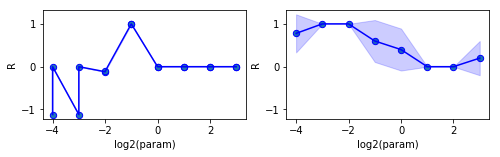

In [2]:
stats_room_default_mceirl = get_stats("mceirl", "room", spec= "default")
stats_room_default_sampling = get_stats("sampling", "room", spec= "default")

plot_params_multiple([stats_room_default_mceirl, stats_room_default_sampling])

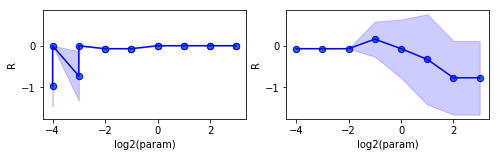

In [3]:
stats_room_bad_mceirl = get_stats("mceirl", "room", spec= "bad")
stats_room_bad_sampling = get_stats("sampling", "room", spec= "bad")

plot_params_multiple([stats_room_bad_mceirl, stats_room_bad_sampling])

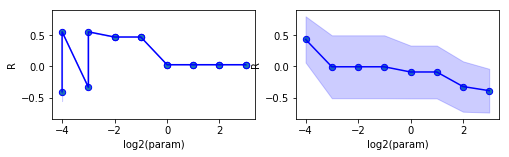

In [4]:
plot_params_multiple([get_stats("mceirl", "train", "default"), 
                      get_stats("sampling", "train", "default")])

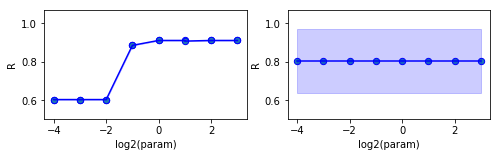

In [5]:
plot_params_multiple([get_stats("mceirl", "apples", spec= "default"), 
                      get_stats("sampling", "apples", spec= "default")])

# Tuning -w, the inferred weight for the inferred reward when adding task and inferred rewards.

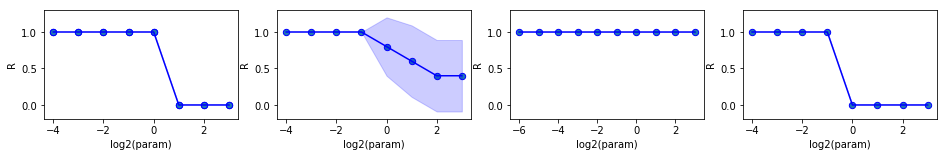

In [6]:
plot_params_multiple([get_stats("mceirl", "room", "default", "add_rewards", "w"), 
                      get_stats("sampling", "room", "default", "add_rewards", "w"),
                      get_stats("reachability", "room", "default", "add_rewards", "w"),
                      get_stats("deviation", "room", "default", "add_rewards", "w")])

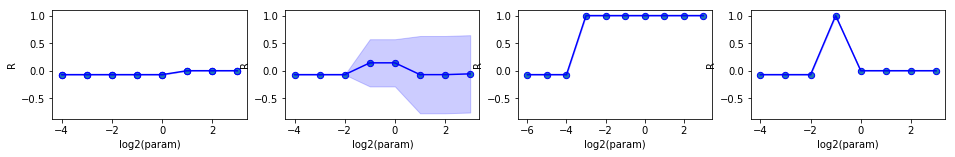

In [7]:
plot_params_multiple([get_stats("mceirl", "room", "bad", "add_rewards", "w"), 
                      get_stats("sampling", "room", "bad", "add_rewards", "w"),
                      get_stats("reachability", "room", "bad", "add_rewards", "w"),
                      get_stats("deviation", "room", "bad", "add_rewards", "w")])

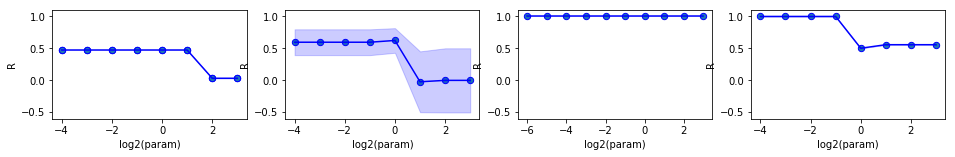

In [8]:
plot_params_multiple([get_stats("mceirl", "train", "default", "add_rewards", "w"), 
                      get_stats("sampling", "train", "default", "add_rewards", "w"),
                      get_stats("reachability", "train", "default", "add_rewards", "w"),
                      get_stats("deviation", "train", "default", "add_rewards", "w")])

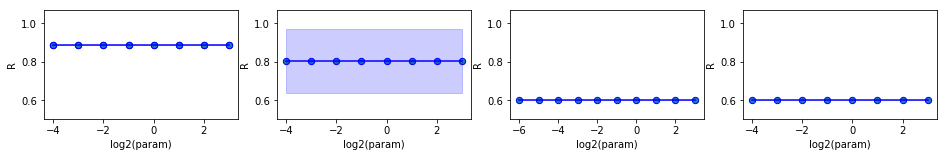

In [9]:
plot_params_multiple([get_stats("mceirl", "apples", "default", "add_rewards", "w"), 
                      get_stats("sampling", "apples", "default", "add_rewards", "w"),
                      get_stats("reachability", "apples", "default", "add_rewards", "w"),
                      get_stats("deviation", "apples", "default", "add_rewards", "w")])

# Adding rewards vs prior in the room env

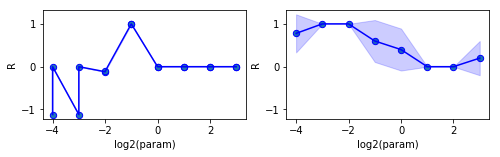

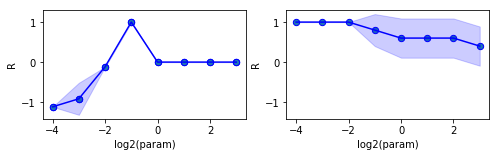

In [10]:
plot_params_multiple([get_stats("mceirl", "room", "default", "use_prior", "k"), 
                      get_stats("sampling", "room", "default", "use_prior", "k")])
plot_params_multiple([get_stats("mceirl", "room", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r"), 
                      get_stats("sampling", "room", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r")])
